# Introduction

In [1]:
import stormpy
import stormpy.core

Load the *agent stochastic maze* MDP model :

In [3]:
path = '../models/agent_stochastic_maze.prism'
prism_program = stormpy.parse_prism_program(path)

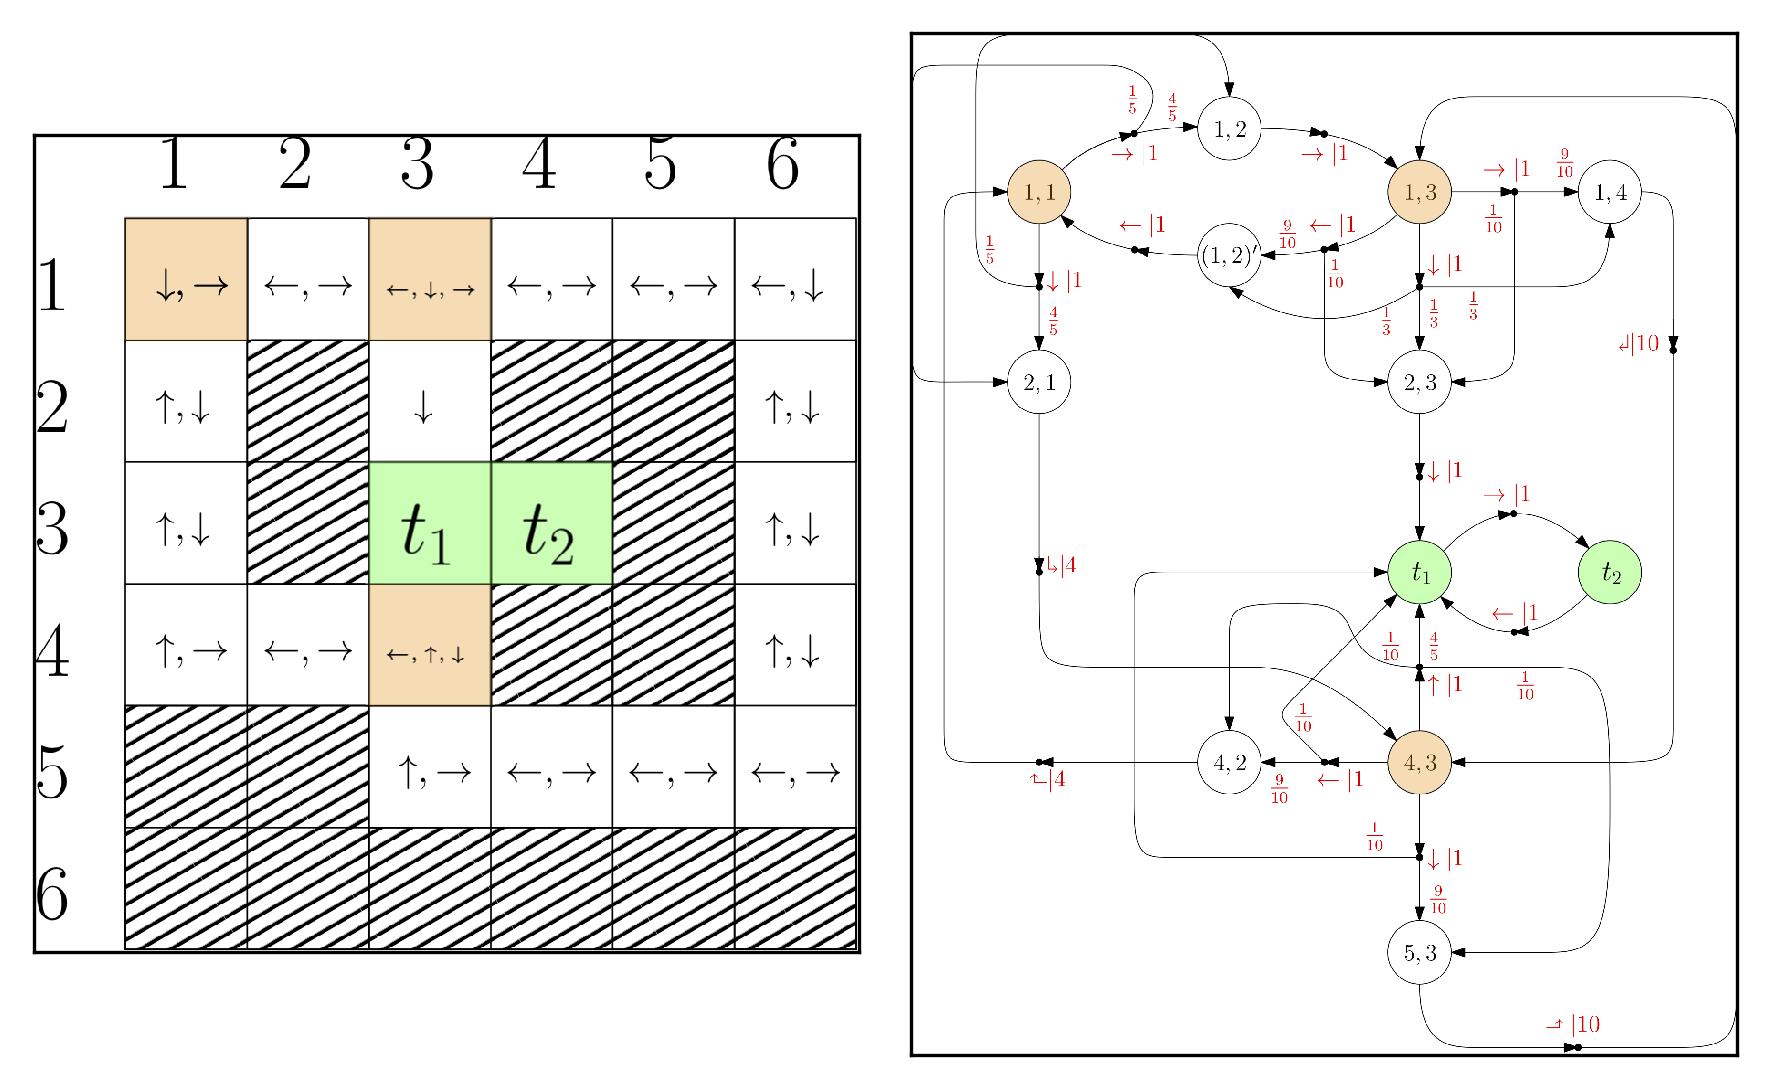

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_dpi(300)

ax1.imshow(mpimg.imread('resources/maze.png'))
ax1.set_xticks([]), ax1.set_yticks([])  # to hide tick values on X and Y axis

ax2.imshow(mpimg.imread('resources/mazePDMP.png'))
ax2.set_xticks([]), ax2.set_yticks([])  # to hide tick values on X and Y axis

plt.tight_layout()
_ = plt.show()

In [4]:
with open(path, 'r') as prism_file:
    print(prism_file.read())

mdp

module MAZE

s: [0..11] init 0;

[right] s=0 -> 0.8 : (s'=1) + 0.2 : (s'=5);
[down] s=0 -> 0.2 : (s'=1) + 0.8 : (s'=5);
[right] s=1 -> 1 : (s'=3);
[left] s=2 -> 1 : (s'=0);
[left] s=3 -> 0.9 : (s'=2) + 0.1 : (s'=6);
[down] s=3 -> 1/3 : (s'=2) + 1/3 : (s'=6) + 1/3 : (s'=4);
[right] s=3 -> 0.9 : (s'=4) + 0.1 : (s'=6);
[downleft] s=4 -> 1 : (s'=10);
[downright] s=5 -> 1 : (s'=10);
[down] s=6 -> 1 : (s'=7);
[right] s=7 -> 1 : (s'=8);
[left] s=8 -> 1 : (s'=7);
[leftup] s=9 -> 1 : (s'=0);
[right] s=10 -> 0.9 : (s'=9) + 0.1 : (s'=7);
[up] s=10 -> 0.1 : (s'=9) + 0.8 : (s'=7) + 0.1 : (s'=11);
[down] s=10 -> 0.1 : (s'=7) + 0.9 : (s'=11);
[rightup] s=11 -> 1 : (s'=3);

endmodule

label "square_1_1" = s=0;
label "square_1_2" = s=1;
label "square_1_2_bis" = s=2;
label "square_1_3" = s=3;
label "square_1_4" = s=4;
label "square_2_1" = s=5;
label "square_2_3" = s=6;
label "T" = s=7 | s=8;
label "square_4_2" = s=9;
label "square_4_3" = s=10;
label "square_5_3" = s=11;

rewards "move"
    [right] 

In [5]:
model = stormpy.build_model(prism_program)
print("Model Type: {}".format(model.model_type))
print("Number of states: {}".format(model.nr_states))
print("Number of transitions: {}".format(model.nr_transitions))

Model Type: ModelType.MDP
Number of states: 12
Number of transitions: 27


In [7]:
print(model.labeling)

13 labels
   * init -> 1 item(s)
   * square_4_3 -> 1 item(s)
   * square_2_1 -> 1 item(s)
   * square_1_4 -> 1 item(s)
   * square_4_2 -> 1 item(s)
   * deadlock -> 0 item(s)
   * square_2_3 -> 1 item(s)
   * square_1_1 -> 1 item(s)
   * square_1_3 -> 1 item(s)
   * T -> 2 item(s)
   * square_1_2 -> 1 item(s)
   * square_5_3 -> 1 item(s)
   * square_1_2_bis -> 1 item(s)



Solve the stochastic shortest path expectation problem :

In [8]:
# PCTL formula
formula = "Rmin=? [F \"T\"]"
properties = stormpy.parse_properties_for_prism_program(formula, prism_program)

In [9]:
model = stormpy.build_model(prism_program, properties)
print(model.labeling)
#print("Labels in the model: {}".format(sorted(model.labeling.get_labels())))

3 labels
   * init -> 1 item(s)
   * deadlock -> 0 item(s)
   * T -> 2 item(s)



## Initial states

In [10]:
for initial_state in model.initial_states:
    print('S[{}]'.format(initial_state))

S[0]


In [11]:
result = stormpy.model_checking(model, properties[0])

In [12]:
assert result.result_for_all_states
states_label = ["(1, 1)", "(1, 2)", "(1, 2)'", "(1, 3)", "(1, 4)", "(2, 1)",
               "(2, 3)", "t1", "t2", "(4, 2)", "(4, 3)", "(5, 3)"]
for s, x in enumerate(result.get_values()):
    print("v[{}]={}".format(s, x))
#print(result.get_values())

v[0]=9.830509648470983
v[1]=10.728815630562762
v[2]=8.355933152948037
v[3]=9.728815630562762
v[4]=4.355933152948038
v[5]=14.355934982064934
v[6]=1.0
v[7]=10.830511909623352
v[8]=0.0
v[9]=13.830511909623352
v[10]=19.728819619857024
v[11]=0.0


# Investigating the model

In [13]:
for state in model.states:
    for action in state.actions:
        descr = "[a{}:{}] s={} -> ".format(state, action, state)
        for transition in action.transitions:
            #print("From state {}, choose the action {} and go to state {} with probability {}".format(state, action, transition.column, transition.value()))
            descr += "{} : (s'={}) + ".format(transition.value(), transition.column)
        print(descr[:-2])

[a0:0] s=0 -> 0.8 : (s'=1) + 0.2 : (s'=2) 
[a0:1] s=0 -> 0.2 : (s'=1) + 0.8 : (s'=2) 
[a1:0] s=1 -> 1.0 : (s'=3) 
[a2:0] s=2 -> 1.0 : (s'=4) 
[a3:0] s=3 -> 0.9 : (s'=5) + 0.1 : (s'=6) 
[a3:1] s=3 -> 0.3333333333333333 : (s'=5) + 0.3333333333333333 : (s'=6) + 0.3333333333333333 : (s'=7) 
[a3:2] s=3 -> 0.1 : (s'=6) + 0.9 : (s'=7) 
[a4:0] s=4 -> 0.1 : (s'=8) + 0.9 : (s'=9) 
[a4:1] s=4 -> 0.1 : (s'=8) + 0.9 : (s'=10) 
[a4:2] s=4 -> 0.8 : (s'=8) + 0.1 : (s'=9) + 0.1 : (s'=10) 
[a5:0] s=5 -> 1.0 : (s'=4) 
[a6:0] s=6 -> 1.0 : (s'=8) 
[a7:0] s=7 -> 1.0 : (s'=0) 
[a8:0] s=8 -> 1.0 : (s'=11) 
[a9:0] s=9 -> 1.0 : (s'=0) 
[a10:0] s=10 -> 1.0 : (s'=3) 
[a11:0] s=11 -> 1.0 : (s'=8) 


# Rewards

In [14]:
reward_model_name = list(model.reward_models.keys())[0]
reward_model_name

'move'

In [15]:
print(model.reward_models[reward_model_name].state_action_rewards)
print("number of rewards : {}".format(len(model.reward_models[reward_model_name].state_action_rewards)))

[1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 10.0, 1.0, 1.0, 1.0, 4.0, 10.0, 1.0]
number of rewards : 17


# Export the model

In [16]:
stormpy.export_to_drn(model, '../models/agent_stochastic_maze_drn')

In [18]:
with open('../models/agent_stochastic_maze_drn', 'r') as prism_file:
    print(prism_file.read())

// Exported by storm
// Original model type: MDP
@type: MDP
@parameters

@reward_models
move 
@nr_states
12
@model
state 0 [0] init
	action 0 [1]
		1 : 0.8
		2 : 0.2
	action 1 [1]
		1 : 0.2
		2 : 0.8
state 1 [0]
	action 0 [1]
		3 : 1
state 2 [0]
	action 0 [4]
		4 : 1
state 3 [0]
	action 0 [1]
		5 : 0.9
		6 : 0.1
	action 1 [1]
		5 : 0.333333
		6 : 0.333333
		7 : 0.333333
	action 2 [1]
		6 : 0.1
		7 : 0.9
state 4 [0]
	action 0 [1]
		8 : 0.1
		9 : 0.9
	action 1 [1]
		8 : 0.1
		10 : 0.9
	action 2 [1]
		8 : 0.8
		9 : 0.1
		10 : 0.1
state 5 [0]
	action 0 [10]
		4 : 1
state 6 [0]
	action 0 [1]
		8 : 1
state 7 [0]
	action 0 [1]
		0 : 1
state 8 [0] T
	action 0 [1]
		11 : 1
state 9 [0]
	action 0 [4]
		0 : 1
state 10 [0]
	action 0 [10]
		3 : 1
state 11 [0] T
	action 0 [1]
		8 : 1

